In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import ElasticNet

from sklearn import svm

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import math as math
import matplotlib.pyplot as plt

import pickle

In [2]:
Data = pd.read_csv('Mordred_Aligned.csv')
Data = Data.drop(['Electrophile_inchi', 'Ligand_inchi'], axis = 1)
Data[[]] = Data[[]].apply(pd.to_numeric)
Data.head(10)

,Electrophile_ABC,Electrophile_ABCGG,Electrophile_nAcid,Electrophile_nBase,Electrophile_nAromAtom,Electrophile_nAromBond,Electrophile_nAtom,Electrophile_nHeavyAtom,Electrophile_nSpiro,Electrophile_nBridgehead,...,Ligand_MW,Ligand_AMW,Ligand_WPath,Ligand_WPol,Ligand_Zagreb1,Ligand_Zagreb2,Ligand_mZagreb1,Ligand_mZagreb2,MeOH,Yield
0,12.455382,11.265688,0,0,9,10,28,16,0,0,...,305.133336,7.265079,1038,33,112,130,6.166667,4.944444,0,87.13
1,12.455382,11.265688,0,0,9,10,28,16,0,0,...,506.289681,6.750529,15000002010,56,184,219,11.152778,7.763889,0,6.37
2,12.455382,11.265688,0,0,9,10,28,16,0,0,...,339.211587,6.281696,1241,36,126,149,5.166667,5.388889,0,71.75
3,12.455382,11.265688,0,0,9,10,28,16,0,0,...,558.291234,6.978640,4911,69,224,271,8.583333,9.055556,0,64.52
4,12.455382,11.265688,0,0,9,10,28,16,0,0,...,350.216338,6.253863,1368,39,130,153,5.416667,5.638889,0,80.44
5,12.455382,11.265688,0,0,9,10,28,16,0,0,...,439.242887,6.655195,2547,57,178,218,6.611111,7.027778,0,83.28
6,12.455382,11.265688,0,0,9,10,28,16,0,0,...,390.247638,6.194407,1845,44,144,169,6.777778,6.333333,0,69.30
7,12.455382,11.265688,0,0,9,10,28,16,0,0,...,389.227237,6.487121,1777,46,152,183,5.888889,6.194444,0,72.88
8,12.455382,11.265688,0,0,9,10,28,16,0,0,...,506.273852,6.661498,3438,72,210,262,8.194444,8.138889,0,75.61
9,12.455382,11.265688,0,0,9,10,28,16,0,0,...,364.231988,6.173424,1505,42,136,161,6.277778,5.833333,0,56.11


In [3]:
Data_Y = Data['Yield']

Data_Y.head()


0    87.13
1     6.37
2    71.75
3    64.52
4    80.44
Name: Yield, dtype: float64

In [4]:
Data_X = Data.drop(['Yield'], axis = 1)
Data_X.head()

,Electrophile_ABC,Electrophile_ABCGG,Electrophile_nAcid,Electrophile_nBase,Electrophile_nAromAtom,Electrophile_nAromBond,Electrophile_nAtom,Electrophile_nHeavyAtom,Electrophile_nSpiro,Electrophile_nBridgehead,...,Ligand_TSRW10,Ligand_MW,Ligand_AMW,Ligand_WPath,Ligand_WPol,Ligand_Zagreb1,Ligand_Zagreb2,Ligand_mZagreb1,Ligand_mZagreb2,MeOH
0,12.455382,11.265688,0,0,9,10,28,16,0,0,...,55.911637,305.133336,7.265079,1038,33,112,130,6.166667,4.944444,0
1,12.455382,11.265688,0,0,9,10,28,16,0,0,...,86.690681,506.289681,6.750529,15000002010,56,184,219,11.152778,7.763889,0
2,12.455382,11.265688,0,0,9,10,28,16,0,0,...,72.139527,339.211587,6.281696,1241,36,126,149,5.166667,5.388889,0
3,12.455382,11.265688,0,0,9,10,28,16,0,0,...,94.602118,558.291234,6.978640,4911,69,224,271,8.583333,9.055556,0
4,12.455382,11.265688,0,0,9,10,28,16,0,0,...,59.737864,350.216338,6.253863,1368,39,130,153,5.416667,5.638889,0


In [5]:
# Create Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(Data_X, Data_Y, test_size = 0.3, random_state = 1981)

## Gradient Boosting Regressor

In [6]:
%%time
steps = [('scaler', StandardScaler()),
        ('GBM', GradientBoostingRegressor())]
pipeline = Pipeline(steps)
parameters = {"GBM__learning_rate": [0.05, 0.1, 0.2],
              "GBM__n_estimators": [50, 100, 200],
              "GBM__min_samples_split": [4, 8, 16],
              "GBM__min_samples_leaf": [25, 50],
              "GBM__max_depth": [3, 5],
              "GBM__random_state": [1981]}
GBM_cv = GridSearchCV(pipeline, param_grid = parameters, cv = 10)
GBM_cv.fit(X_train, Y_train)
GBM_Y_Pred = GBM_cv.predict(X_test)
mse = mean_squared_error(Y_test, GBM_Y_Pred)
math.sqrt(mse)

CPU times: user 2h 30min 32s, sys: 3min 31s, total: 2h 34min 4s
Wall time: 1h 30min 52s


13.710524751609288

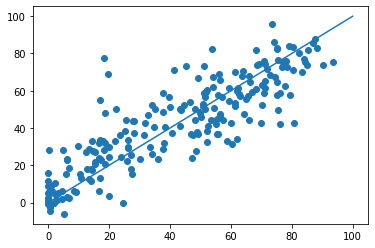

In [7]:
plt.scatter(Y_test, GBM_Y_Pred)
plt.plot( [0, 100], [0, 100])

In [8]:
GBM_cv.best_score_

0.6968221968965507

In [9]:
GBM_cv.best_params_

{'GBM__learning_rate': 0.2,
 'GBM__max_depth': 5,
 'GBM__min_samples_leaf': 50,
 'GBM__min_samples_split': 4,
 'GBM__n_estimators': 100,
 'GBM__random_state': 1981}

In [10]:
steps = [('scaler', StandardScaler()),
        ('GBM', GradientBoostingRegressor())]
pipeline = Pipeline(steps)
parameters = {"GBM__learning_rate": [0.2],
              "GBM__n_estimators": [100],
              "GBM__min_samples_split": [4],
              "GBM__min_samples_leaf": [50],
              "GBM__max_depth": [5],
              "GBM__random_state": [1981]}
GBM_Final_cv = GridSearchCV(pipeline, param_grid = parameters, cv = 10)
GBM_Final_cv.fit(Data_X, Data_Y)
GBM_Final_Y_Pred = GBM_Final_cv.predict(Data_X)
mse = mean_squared_error(Data_Y, GBM_Final_Y_Pred)
math.sqrt(mse)


7.133374351089682

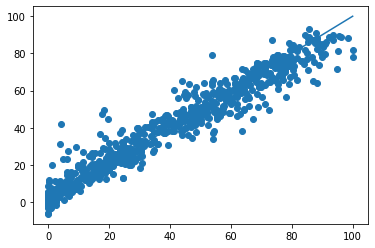

In [11]:
plt.scatter(Data_Y, GBM_Final_Y_Pred)
plt.plot( [0, 100], [0, 100])

In [12]:
GBM_Final_cv.best_score_

0.15926820566109123

In [9]:
filename = 'Predict_RXN_NiBorylation.sav'
pickle.dump(GBM_Final_cv, open(filename, 'wb'))

In [20]:
Pkl_Filename = "finalized_mordred_gbm_model_1.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(GBM_Final_cv, file)